# DBSCAN Clustering

In [18]:
import pandas as pd
import numpy as np

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium # map rendering library

#!pip install geopy
from geopy.distance import great_circle

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

% matplotlib inline

In [2]:
' Read in data files '
df_dublin_restaurants = pd.read_csv('./Data/Dublin/dublin_restaurants.csv',encoding='utf-8')
df_zurich_restaurants = pd.read_csv('./Data/Zurich/zurich_restaurants.csv',encoding='utf-8')
df_toronto_restaurants = pd.read_csv('./Data/Toronto/toronto_restaurants.csv',encoding='utf-8')

print("Number of Restaurants")
print("Dublin: {}".format(len(df_dublin_restaurants)))
print("Zurich: {}".format(len(df_zurich_restaurants)))
print("Toronto: {}".format(len(df_toronto_restaurants)))

Number of Restaurants
Dublin: 628
Zurich: 1007
Toronto: 3760


In [3]:
def get_restaurant_type(category):

    return category.replace(' Restaurant','').lower()


df_dublin_restaurants['type'] = df_dublin_restaurants['category'].apply(get_restaurant_type)
df_zurich_restaurants['type'] = df_zurich_restaurants['category'].apply(get_restaurant_type)
df_toronto_restaurants['type'] = df_toronto_restaurants['category'].apply(get_restaurant_type)

print("Number of unique Restaurant Types:")
print("Dublin: {}".format(df_dublin_restaurants['type'].nunique()))
print("Zurich: {}".format(df_zurich_restaurants['type'].nunique()))
print("Toronto: {}".format(df_toronto_restaurants['type'].nunique()))

Number of unique Restaurant Types:
Dublin: 47
Zurich: 60
Toronto: 96


# Dublin: DBSCAN

In [23]:
X = df_dublin_restaurants[['lat_venue','long_venue']].values

In [88]:
eps_in_metres = 500
db = DBSCAN(eps=(eps_in_metres/111000.0), min_samples=5)
dbscan_results = db.fit(X)

In [89]:
labels = dbscan_results.labels_ + 1
n_clusters = len(set(labels)) - (1 if 0 in labels else 0)
n_noise = list(labels).count(0)
print("Number of clusters = {}".format(n_clusters))
print("Number of outliers = {}".format(n_noise))

Number of clusters = 20
Number of outliers = 219


In [90]:
# Coordinates of Dublin
latitude = 53.3498
longitude = -6.2603

# create map of Toronto using latitude and longitude values
map_dublin = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(n_clusters + 1)
ys = [i + x + (i*x)**2 for i in range(n_clusters + 1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for i in range(len(labels)):
    lat = X[i][0]
    lng = X[i][1]
    label = 'Custer #{}'.format(labels[i])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[labels[i]],
        fill=True,
        fill_color=rainbow[labels[i]],
        fill_opacity=0.7,
        parse_html=False).add_to(map_dublin) 
    
map_dublin

# Dublin: Hierarchical Clustering

In [92]:
X = df_dublin_restaurants[['lat_venue','long_venue']].values

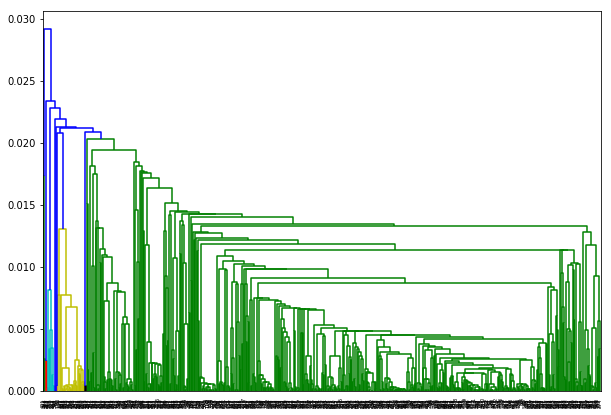

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(len(X))

plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()

In [100]:
from sklearn.cluster import AgglomerativeClustering 

num_clusters = 8
hc = AgglomerativeClustering(n_clusters = num_clusters, affinity = 'euclidean', linkage ='ward')
hc.fit(X)
labels = hc.labels_

In [101]:
# Coordinates of Dublin
latitude = 53.3498
longitude = -6.2603

# create map of Toronto using latitude and longitude values
map_dublin = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(num_clusters + 1)
ys = [i + x + (i*x)**2 for i in range(num_clusters + 1)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to map
for i in range(len(labels)):
    lat = X[i][0]
    lng = X[i][1]
    label = 'Custer #{}'.format(labels[i])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[labels[i]],
        fill=True,
        fill_color=rainbow[labels[i]],
        fill_opacity=0.7,
        parse_html=False).add_to(map_dublin) 
    
map_dublin

## Read in Data

In [102]:
' Read in data files '
df_dublin_restaurants = pd.read_csv('./Data/Dublin/dublin_restaurants.csv',encoding='utf-8')
df_zurich_restaurants = pd.read_csv('./Data/Zurich/zurich_restaurants.csv',encoding='utf-8')
df_toronto_restaurants = pd.read_csv('./Data/Toronto/toronto_restaurants.csv',encoding='utf-8')
df_sarajevo_restaurants = pd.read_csv('./Data/Sarajevo/sarajevo_restaurants.csv',encoding='utf-8')
df_warsaw_restaurants = pd.read_csv('./Data/Warsaw/warsaw_restaurants.csv',encoding='utf-8')
df_vienna_restaurants = pd.read_csv('./Data/Vienna/vienna_restaurants.csv',encoding='utf-8')

print("Number of Restaurants")
print("Dublin: {}".format(len(df_dublin_restaurants)))
print("Zurich: {}".format(len(df_zurich_restaurants)))
print("Toronto: {}".format(len(df_toronto_restaurants)))
print("Sarajevo: {}".format(len(df_sarajevo_restaurants)))
print("Warsaw: {}".format(len(df_warsaw_restaurants)))
print("Vienna: {}".format(len(df_vienna_restaurants)))

Number of Restaurants
Dublin: 628
Zurich: 1007
Toronto: 3760
Sarajevo: 117
Warsaw: 1758
Vienna: 1475


## Extract and Append Restaurant Type column

In [103]:
def get_restaurant_type(category):

    return category.replace(' Restaurant','').lower()


df_dublin_restaurants['type'] = df_dublin_restaurants['category'].apply(get_restaurant_type)
df_zurich_restaurants['type'] = df_zurich_restaurants['category'].apply(get_restaurant_type)
df_toronto_restaurants['type'] = df_toronto_restaurants['category'].apply(get_restaurant_type)
df_sarajevo_restaurants['type'] = df_sarajevo_restaurants['category'].apply(get_restaurant_type)
df_warsaw_restaurants['type'] = df_warsaw_restaurants['category'].apply(get_restaurant_type)
df_vienna_restaurants['type'] = df_vienna_restaurants['category'].apply(get_restaurant_type)

print("Number of unique Restaurant Types:")
print("Dublin: {}".format(df_dublin_restaurants['type'].nunique()))
print("Zurich: {}".format(df_zurich_restaurants['type'].nunique()))
print("Toronto: {}".format(df_toronto_restaurants['type'].nunique()))
print("Sarajevo: {}".format(df_sarajevo_restaurants['type'].nunique()))
print("Warsaw: {}".format(df_warsaw_restaurants['type'].nunique()))
print("Vienna: {}".format(df_vienna_restaurants['type'].nunique()))

Number of unique Restaurant Types:
Dublin: 47
Zurich: 60
Toronto: 96
Sarajevo: 25
Warsaw: 81
Vienna: 64


## Construct our vocabulary for clustering purposes

In [112]:
all_categories = []
all_categories.extend( list(df_dublin_restaurants['type'].values) )
all_categories.extend( list(df_zurich_restaurants['type'].values) )
all_categories.extend( list(df_toronto_restaurants['type'].values) )
all_categories.extend( list(df_sarajevo_restaurants['type'].values) )
all_categories.extend( list(df_warsaw_restaurants['type'].values) )
all_categories.extend( list(df_vienna_restaurants['type'].values) )

all_categories = list(set(all_categories))